# Assignment 10

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts


#plotly or other graphing library

import seaborn as sns
import plotly.express as px

In [2]:
# Load datasets here once and assign to variables iris and boston


iris = ds.load_iris()
boston = ds.load_boston()
#iris.columns = ds.load_iris().feature_names

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
# Create iris dataframe and setting X-variable
X = pd.DataFrame(iris['data'])
# Using feature_names for column names of X
X.columns = iris['feature_names']
print("Iris Features:")
display(X.head())

Iris Features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:

# Assigning y-variable as target names
y = iris['target']
print("Iris Target Names:")
print(iris['target_names'])

Iris Target Names:
['setosa' 'versicolor' 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [5]:
knn = KNN(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [6]:
# Predict new observations
new_observations = knn.predict(X)
print("New Observations:")
print(iris['target_names'][new_observations])

New Observations:
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
knn = KNN(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [8]:
neighbors = np.arange(1, 31)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
  	# Set up a KNN Classifier
  	knn = KNN(n_neighbors=neighbor)
  
  	# Fit the model
  	knn.fit(X_train, y_train)
  
  	# Compute accuracy
  	train_accuracies[neighbor] = knn.score(X_train, y_train)
  	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
 {1: 1.0, 2: 0.9821428571428571, 3: 0.9553571428571429, 4: 0.9642857142857143, 5: 0.9732142857142857, 6: 0.9732142857142857, 7: 0.9732142857142857, 8: 0.9732142857142857, 9: 0.9732142857142857, 10: 0.9732142857142857, 11: 0.9732142857142857, 12: 0.9642857142857143, 13: 0.9821428571428571, 14: 0.9821428571428571, 15: 0.9821428571428571, 16: 0.9732142857142857, 17: 0.9821428571428571, 18: 0.9821428571428571, 19: 0.9821428571428571, 20: 0.9821428571428571, 21: 0.9821428571428571, 22: 0.9642857142857143, 23: 0.9732142857142857, 24: 0.9642857142857143, 25: 0.9642857142857143, 26: 0.9553571428571429, 27: 0.9553571428571429, 28: 0.9642857142857143, 29: 0.9642857142857143, 30: 0.9642857142857143} 
 {1: 0.9473684210526315, 2: 0.9210526315789473, 3: 0.9736842105263158, 4: 0.9736842105263158, 5: 0.9736842105263158, 6: 0.9473684210526315, 7: 0.9473684210526315, 8: 0.9473684210526315, 9: 0.9736842105263158

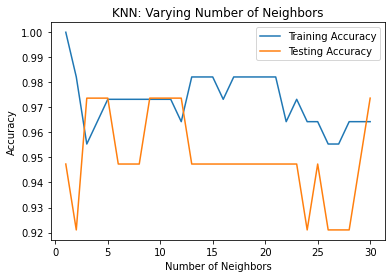

In [9]:
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [10]:
# Assigning data and feature_names as X_boston variable
X_boston = pd.DataFrame(boston['data'])
X_boston.columns=boston['feature_names']

In [11]:
# Storing target and naming column MEDV into y_boston
y_boston = pd.DataFrame(boston['target'])
y_boston.columns = ['MEDV']

In [12]:
# Printing average age and average median home value
print('Average Age:', np.mean(X_boston['AGE']))
print('Average Median Home Value:', np.median(y_boston['MEDV']))

Average Age: 68.57490118577076
Average Median Home Value: 21.2


In [13]:
# Printing Target Values and using np.array to change values to array
print('Target Values:')
y_boston_array = np.array(y_boston)
print(y_boston_array)

Target Values:
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

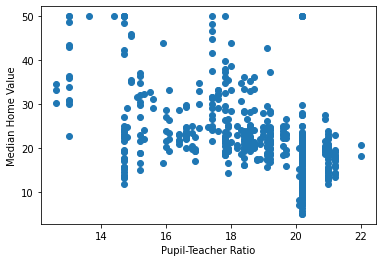

In [14]:
plt.scatter(x=X_boston['PTRATIO'], y=y_boston['MEDV'])
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Median Home Value')
plt.show()

In [15]:
# Printing PTRATIO as numpy array
X_boston_array = np.array(X_boston['PTRATIO'])
print(X_boston_array)

[15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 15.2 15.2 15.2 21.
 21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.
 21.  21.  21.  21.  21.  21.  21.  19.2 19.2 19.2 19.2 18.3 18.3 17.9
 17.9 17.9 17.9 17.9 17.9 17.9 17.9 17.9 16.8 16.8 16.8 16.8 21.1 17.9
 17.3 15.1 19.7 19.7 19.7 19.7 19.7 19.7 18.6 16.1 16.1 18.9 18.9 18.9
 19.2 19.2 19.2 19.2 18.7 18.7 18.7 18.7 18.7 18.7 19.  19.  19.  19.
 18.5 18.5 18.5 18.5 17.8 17.8 17.8 17.8 18.2 18.2 18.2 18.  18.  18.
 18.  18.  20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 17.8
 17.8 17.8 17.8 17.8 17.8 17.8 17.8 17.8 19.1 19.1 19.1 19.1 19.1 19.1
 19.1 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2
 21.2 21.2 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7
 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7
 14.7 14.7 14.7 14.7 16.6 16.6 16.6 16.6 16.6 16.6 16.6 17.8 17.8 17.8
 17.8 17.8 17.8 17.8 17.8 15.2 15.2 15.2 15.2 15.2 15.2 15.6 15.6 14.4
 12.6 12.6

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib

* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

In [16]:
from sklearn.linear_model import LinearRegression

# Using previous X and y arrays, reassigning and reshaping each variable
boston_X = X_boston_array.reshape(-1, 1)
boston_y = y_boston_array.reshape(-1, 1)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.25, random_state=42)

# Instantiate model
lin_reg = LinearRegression()

# Fitting model
lin_reg.fit(boston_X, boston_y)

# Creating prediction space x-values from min to max, using .reshape()
x_test = np.linspace(np.min(boston_X), np.max(boston_X)).reshape(-1, 1)

# Predicting y-values
y_pred = lin_reg.predict(x_test)

# Printing Prediction Space(x_test) and Predicted Values(y_pred)
print("Prediction Space (x_test):", x_test)
print()
print("Predicted Values (y_pred):", y_pred)

Prediction Space (x_test): [[12.6       ]
 [12.79183673]
 [12.98367347]
 [13.1755102 ]
 [13.36734694]
 [13.55918367]
 [13.75102041]
 [13.94285714]
 [14.13469388]
 [14.32653061]
 [14.51836735]
 [14.71020408]
 [14.90204082]
 [15.09387755]
 [15.28571429]
 [15.47755102]
 [15.66938776]
 [15.86122449]
 [16.05306122]
 [16.24489796]
 [16.43673469]
 [16.62857143]
 [16.82040816]
 [17.0122449 ]
 [17.20408163]
 [17.39591837]
 [17.5877551 ]
 [17.77959184]
 [17.97142857]
 [18.16326531]
 [18.35510204]
 [18.54693878]
 [18.73877551]
 [18.93061224]
 [19.12244898]
 [19.31428571]
 [19.50612245]
 [19.69795918]
 [19.88979592]
 [20.08163265]
 [20.27346939]
 [20.46530612]
 [20.65714286]
 [20.84897959]
 [21.04081633]
 [21.23265306]
 [21.4244898 ]
 [21.61632653]
 [21.80816327]
 [22.        ]]

Predicted Values (y_pred): [[35.16421874]
 [34.75039328]
 [34.33656781]
 [33.92274235]
 [33.50891688]
 [33.09509142]
 [32.68126595]
 [32.26744049]
 [31.85361502]
 [31.43978956]
 [31.02596409]
 [30.61213863]
 [30.19831316]

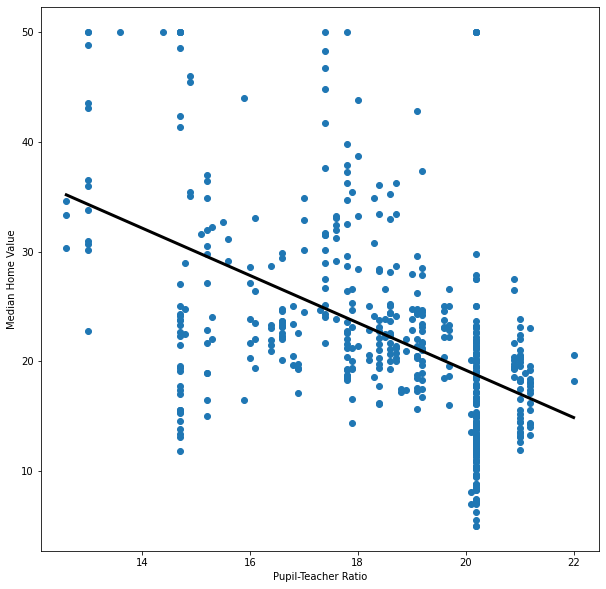

In [17]:
# Creating scatterplot of regression model with regression line
plt.figure(figsize=(10,10))
plt.scatter(boston_X, boston_y)
plt.plot(x_test, y_pred, color='black', linewidth=3)
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Median Home Value')
plt.show()